In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [13]:
IMAGE_PATH = "../images/KITTI/2011_09_26/image_02/data"
image_names = sorted(os.listdir(IMAGE_PATH))
image_paths = [ os.path.join(IMAGE_PATH, name) for name in image_names] 

(-0.5, 1241.5, 374.5, -0.5)

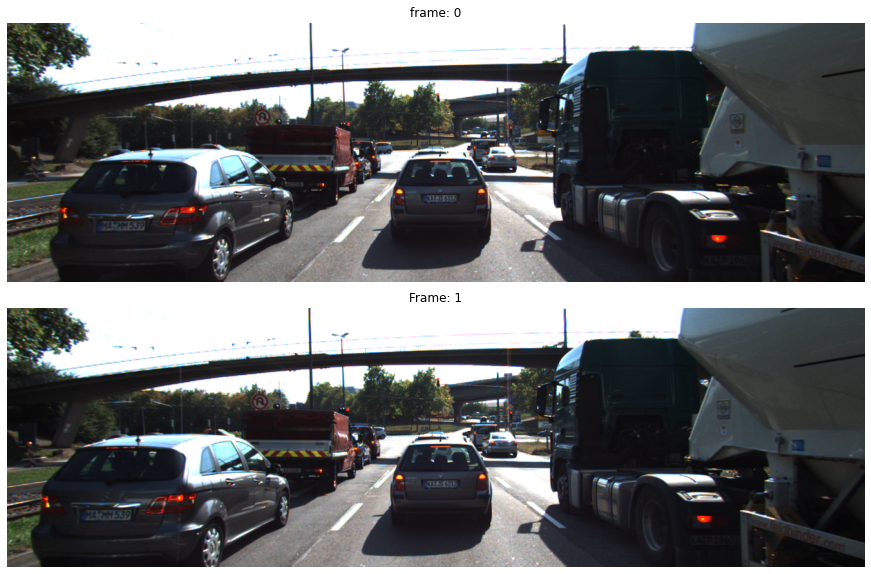

In [57]:
# Read two successive image
prevImg = cv2.imread(image_paths[0])
currImg = cv2.imread(image_paths[1])

# Show images
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(20, 10)
fig.subplots_adjust(wspace=0.05, hspace=0.1)

ax1.set_title("frame: 0")
ax1.imshow(prevImg[:,:,::-1])
ax1.axis('off')

ax2.set_title("Frame: 1")
ax2.imshow(currImg[:,:,::-1])
ax2.axis('off')

In [30]:
currGray = cv2.cvtColor(currImg, cv2.COLOR_BGR2GRAY)
prevGray = cv2.cvtColor(prevImg, cv2.COLOR_BGR2GRAY)

In [48]:
fast = cv2.FastFeatureDetector_create()

keypointCurr = fast.detect(currGray, None)
keypointPrev = fast.detect(prevGray, None)

In [49]:
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

keypointCurr, descriptorCurr = brief.compute(currGray, keypointCurr, None)
keypointPrev, descriptorPrev = brief.compute(prevGray, keypointPrev, None)

(-0.5, 1241.5, 374.5, -0.5)

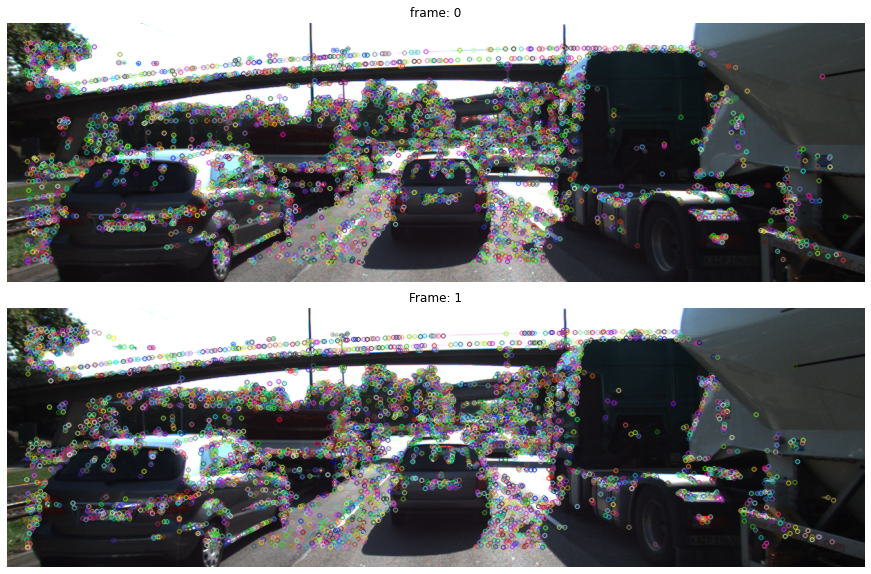

In [53]:
currKpImg = cv2.drawKeypoints(currImg, keypointCurr, None)
prevKpImg = cv2.drawKeypoints(prevImg, keypointPrev, None)

# Show images
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(20, 10)
fig.subplots_adjust(wspace=0.05, hspace=0.1)

ax1.set_title("frame: 0")
ax1.imshow(prevKpImg[:,:,::-1])
ax1.axis('off')

ax2.set_title("Frame: 1")
ax2.imshow(currKpImg[:,:,::-1])
ax2.axis('off')

In [62]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptorPrev, descriptorCurr, None)

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.2)
matches = matches[:numGoodMatches]

# Draw top matches
imMatches = cv2.drawMatches(currImg, keypointCurr, prevImg, keypointPrev, matches, None)

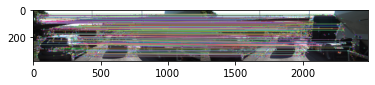

In [63]:
plt.imshow(imMatches[:,:,::-1])

In [80]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(currGray)

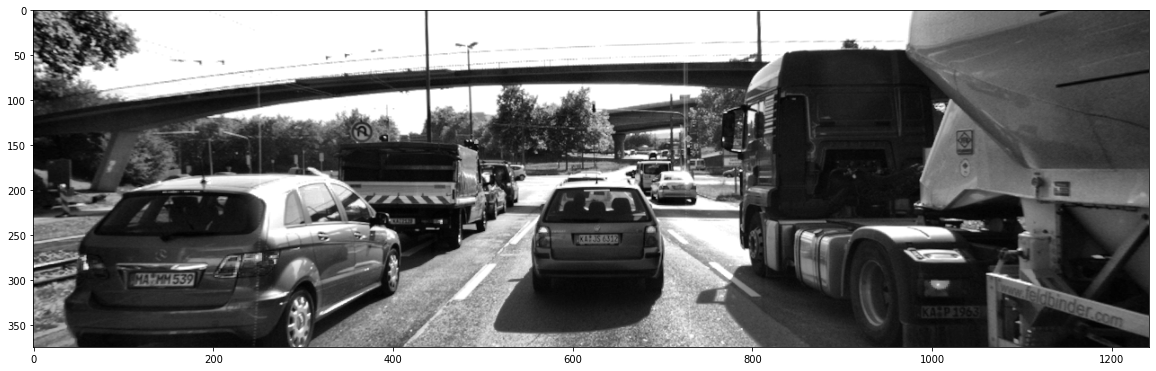

In [81]:
plt.figure(figsize = (20,10))
plt.imshow(cl1, cmap="gray")

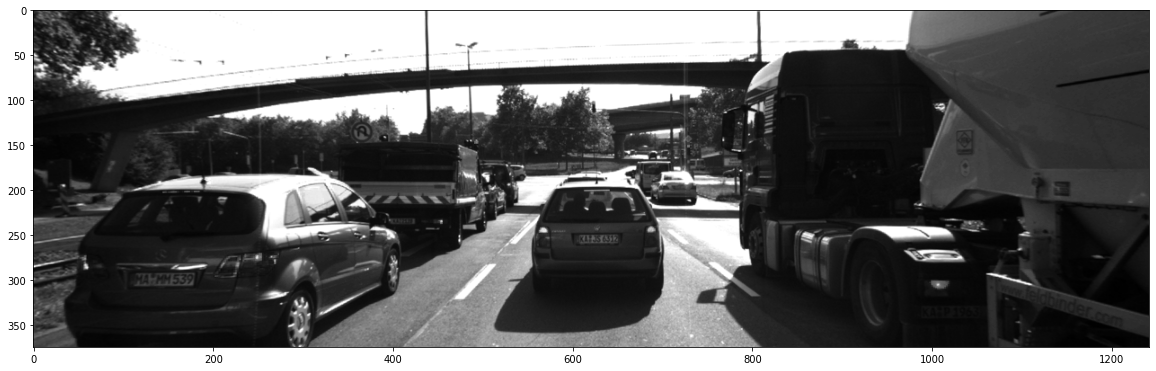

In [74]:
plt.figure(figsize = (20,10))
plt.imshow(currGray, cmap="gray")